In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import datetime as dt
from metloom.pointdata import MesowestPointData, SnotelPointData

: 

In [ ]:
def normalize_data(df):
    '''Normalized a pandas series'''
    norm = (df - df.mean())/df.std()
    norm.index = norm.index.astype(int)
    return norm

In [50]:
er_smn5_2016_2018 = pd.read_csv("../../data/ER_SMN5.csv", index_col=0)
er_smn5_2016_2018.index = pd.to_datetime(er_smn5_2016_2018.index, format="%m/%d/%Y %H:%M")

In [302]:
snotel_point = SnotelPointData("380:CO:SNTL", "Butte")
butte_df = snotel_point.get_daily_data(
    datetime(1991, 1, 1), datetime(2021, 12, 31),
    [snotel_point.ALLOWED_VARIABLES.PRECIPITATION,
     snotel_point.ALLOWED_VARIABLES.PRECIPITATIONACCUM,
     snotel_point.ALLOWED_VARIABLES.SNOWDEPTH,
     snotel_point.ALLOWED_VARIABLES.SWE,
     snotel_point.ALLOWED_VARIABLES.TEMP]
)
butte_df = butte_df.droplevel(1)

# Add water year
butte_df['water_year'] =  butte_df.index.year.where(butte_df.index.month < 10, butte_df.index.year + 1)

# Get max swe
butte_max_swe_mm = butte_df['SWE'].groupby(butte_df.index.year).max()*25.4

In [341]:
butte_df['SWE'].groupby(butte_df.index.year).idxmin()

AttributeError: 'Series' object has no attribute 'timetuple'

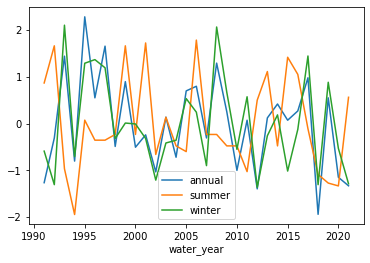

In [307]:
butte_df = butte_df[butte_df['water_year'] != 2022]
butte_precip_summer = butte_df.loc[(butte_df.index.month > 5) & (butte_df.index.month < 9)]

butte_precip_winter = butte_df.loc[(butte_df.index.month < 5) | (butte_df.index.month >= 12)]


butte_precip_annual = normalize_data(butte_df['PRECIPITATON'].groupby(butte_df['water_year']).sum())

butte_precip_previous = butte_precip_annual.copy()
butte_precip_previous.index = butte_precip_annual.index + 1
butte_precip_previous.name = 'PREVIOUS 1YR PRECIP'


tmp = []
yr = []
for i,val in enumerate(butte_precip_annual):
    if i < len(butte_precip_annual)-1:
        tmp.append(np.mean([val,butte_precip_annual.iloc[i+1]]))
        yr.append(butte_precip_annual.index[i]+2)
butte_precip_previous2yr = pd.Series(data=tmp,index=yr)
butte_precip_previous2yr.name = 'PREVIOUS 2YR PRECIP'

butte_precip_summer = normalize_data(butte_precip_summer['PRECIPITATON'].groupby(butte_precip_summer['water_year']).sum())
butte_precip_summer.name = 'SUMMER PRECIP'
butte_precip_winter = normalize_data(butte_precip_winter['PRECIPITATON'].groupby(butte_precip_winter['water_year']).sum())
butte_precip_winter.name = 'WINTER PRECIP'

butte_precip_previous_winter = butte_precip_winter.copy()
butte_precip_previous_winter.index = butte_precip_winter.index + 1
butte_precip_previous_winter.name = 'PREVIOUS 1YR PRECIP WINTER'

butte_precip_annual.plot(label='annual')
butte_precip_summer.plot(label='summer')
butte_precip_winter.plot(label='winter')
plt.legend()

<AxesSubplot:xlabel='Year'>

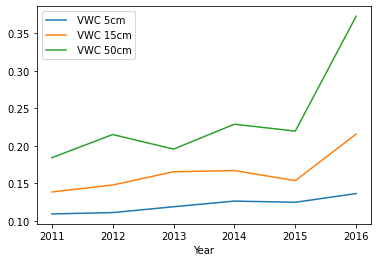

In [362]:
df = pd.read_csv("../../data/Carbone_RMBL_Soil_CO2_Spruce 2011-2016.csv")
summer_sm = df[df[" Month"].isin([6,7,8,9,10])][['Year',' Month', ' VWC 5cm',' VWC 15cm',' VWC 50cm']].dropna()
summer_sm_mean = summer_sm.groupby(summer_sm['Year']).mean()
summer_sm_mean[[' VWC 5cm',' VWC 15cm', ' VWC 50cm']].plot()

In [351]:
live_fuel_moisture = pd.read_csv(r"C:\Users\dlhogan\Downloads\RMCC_CO_GunnisonNF_TaylorPark_PineLodgepole_data.txt", sep='\t', index_col=4)
live_fuel_moisture.index = pd.to_datetime(live_fuel_moisture.index)
live_fuel_moisture_annual = live_fuel_moisture['Percent'].groupby(live_fuel_moisture.index.year).mean()

In [333]:
er_sm_summer = er_smn5_2016_2018[er_smn5_2016_2018.index.month.isin([7,8,9])]
er_sm_summer_mean = er_sm_summer.groupby(er_sm_summer.index.year).mean()
er_sm_summer_mean

,Moisture_m3/m3_50cm,Tempearture_C_50cm,EC_mS/cm_50cm,Moisture_m3/m3_10cm,Tempearture_C_10cm,EC_mS/cm_10cm
DateTime,,,,,,
2017,0.304289,9.485581,0.239949,0.158360,10.144382,0.007851
2018,0.290121,10.104167,0.159203,0.207123,11.448098,0.090892


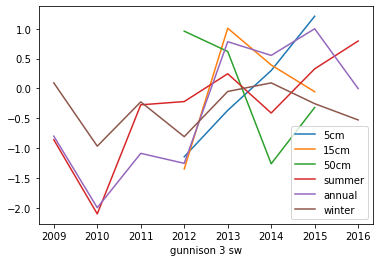

In [335]:
normalize_data(summer_sm_mean[' VWC 5cm']).plot(label='5cm')
normalize_data(summer_sm_mean[' VWC 15cm']).plot(label='15cm')
normalize_data(summer_sm_mean[' VWC 50cm']).plot(label='50cm')
gunnison_precip_summer.loc[2009:2016].plot(label='summer')
gunnison_precip_annual.loc[2009:2016].plot(label='annual')
gunnison_precip_winter.loc[2009:2016].plot(label='winter')
plt.legend()

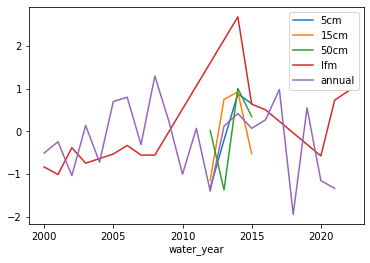

In [361]:
normalize_data(summer_sm_mean[' VWC 5cm']).plot(label='5cm')
normalize_data(summer_sm_mean[' VWC 15cm']).plot(label='15cm')
normalize_data(summer_sm_mean[' VWC 50cm']).plot(label='50cm')
normalize_data(live_fuel_moisture_annual).plot(label='lfm')
butte_precip_annual.loc[2000:2021].plot(label='annual')
# butte_precip_summer.loc[2009:2016].plot(label='summer')
# butte_precip_winter.loc[2009:2016].plot(label='winter')
# butte_precip_previous_winter.loc[2009:2016].plot(label='previous'),
plt.legend()

<AxesSubplot:>

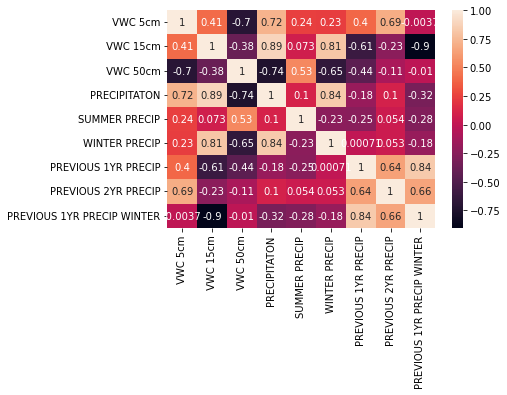

In [336]:
import seaborn as sns

sns.heatmap(pd.concat([normalize_data(summer_sm_mean[' VWC 5cm']),
normalize_data(summer_sm_mean[' VWC 15cm']),
normalize_data(summer_sm_mean[' VWC 50cm']),
butte_precip_annual,
butte_precip_summer,
butte_precip_winter,
butte_precip_previous,
butte_precip_previous2yr,
butte_precip_previous_winter], axis=1).corr(), annot=True)

In [316]:
butte_precip_previous2yr

1993   -0.786973
1994    0.567452
1995    0.319691
1996    0.740884
1997    1.418097
1998    1.104267
1999    0.583969
2000    0.204070
2001    0.195811
2002   -0.374039
2003   -0.638317
2004   -0.448367
2005   -0.291452
2006   -0.010656
2007    0.749143
2008    0.245363
2009    0.493124
2010    0.773919
2011   -0.374039
2012   -0.464884
2013   -0.663093
2014   -0.638317
2015    0.270139
2016    0.245363
2017    0.171035
2018    0.625263
2019   -0.481402
2020   -0.696128
2021   -0.299710
2022   -1.241201
Name: PREVIOUS 2YR PRECIP, dtype: float64

In [363]:
import xarray as xr

In [380]:
myFile=r"C:\Users\dlhogan\Downloads\soil_gridMET.nc"
sm_ds = xr.open_dataset(myFile, decode_times=False)

dates = []
start = dt.date(1900,1,1)

for day in sm_ds.time.to_numpy():
    delta = dt.timedelta(day)
    offset = start + delta
    dates.append(offset)
sm_ds['time'] = pd.to_datetime(dates)

<AxesSubplot:xlabel='water_year'>

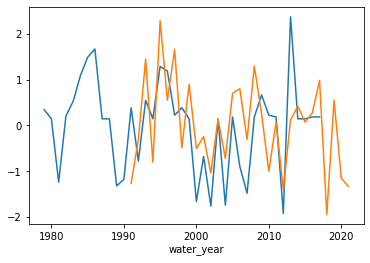

In [406]:
sm_crested_butte = sm_ds.sel(lat=38.8697, lon=-106.9878, method='nearest')
sm_crested_butte_summer = sm_crested_butte.where(sm_crested_butte['time.month'].isin([5,6,7,8,9,10,11])).soil
sm_crested_butte_summer_mean = sm_crested_butte_summer.groupby(sm_crested_butte_summer['time.year']).mean()
normalize_data(sm_crested_butte_summer_mean.to_pandas()).plot()
butte_precip_annual.plot()

In [405]:
normalize_data(sm_crested_butte_summer_mean.to_pandas())

year
1979    0.665503
1980    0.023062
1981   -1.069088
1982    0.087306
1983    1.115212
1984    0.215794
1985    1.372188
1986    1.436432
1987    0.023062
1988    0.023062
1989   -0.876356
1990   -0.812112
1991    0.793991
1992   -0.362403
1993    0.023062
1994    0.023062
1995    3.299511
1996    0.023062
1997    0.023062
1998    0.023062
1999    0.023062
2000   -1.326065
2001   -0.362403
2002   -1.583041
2003    0.023062
2004   -1.583041
2005    0.023062
2006   -1.390309
2007   -1.133332
2008    0.023062
2009    0.665503
2010    0.023062
2011    0.023062
2012   -1.711529
2013    2.143117
2014    0.023062
2015    0.023062
2016    0.023062
2017    0.023062
dtype: float32